In [1]:
import nwb

# run the nwb example

this will create `sample_behavior.nwb` in the current folder

In [2]:
########################################################################
# create a new NWB file
# several settings are specified when doing so. these can be supplied within
#   the NWB constructor or defined in a dict, as in in this example
settings = {}
settings["filename"] = "sample_behavior.nwb"

# each file should have a descriptive globally unique identifier 
#   that specifies the lab and this experiment session
# the function nwb.create_identifier() is recommended to use as it takes
#   the string and appends the present date and time
settings["identifier"] = nwb.create_identifier("behavioral interval example")

# indicate that it's OK to overwrite exting file
settings["overwrite"] = True

# specify the start time of the experiment. all times in the NWB file
#   are relative to experiment start time
# if the start time is not specified the present time will be used
settings["start_time"] = "Sat Jul 04 2015 3:14:16"

# provide one or two sentences that describe the experiment and what
#   data is in the file
settings["description"] = "Test file demonstrating use of the BehavioralEpochs module interface"

# create the NWB object. this manages the file
print "Creating " + settings["filename"]
neurodata = nwb.NWB(**settings)


########################################################################
# processed information is stored in modules, with each module publishing
#   one or more 'interfaces'. an interface is like a contract, promising
#   that the module will provide a specific and defined set of data.
# this module will publish 'BehavioralEpochs' interface, which promises
#   that it will publish IntervalSeries (a type of time series storing
#   experimental intervals)
#
# create the module
mod = neurodata.create_module("my behavioral module")
mod.set_description("sample module that stores behavioral interval data")

# add an interface
iface_1 = mod.create_interface("BehavioralEpochs")
iface_1.set_source("a description of the original data that these intervals were calculated from ")

# interval data is stored in an interval time series -- IntervalSeries
# create it
interval = neurodata.create_timeseries("IntervalSeries", "intervals")
interval.set_description("Sample interval series -- two series are overlaid here, one with a code '1' and another with the code '2'")
interval.set_comment("For example, '1' represents sound on(+1)/off(-1) and '2' represents light on(+2)/off(-2)")

# create 
evts = [ 1, -1, 2, -2, 1, -1, 2, 1, -1, -2, 1, 2, -1, -2 ]
interval.set_data(evts)

# note: some timestamps will be duplicated if two different events start 
#   and/or stop at the same time
t = [ 1, 2, 2, 3, 5, 6, 6, 7, 8, 8, 10, 10, 11, 15 ]
interval.set_time(t)

# add the time series to the module interface. the interface will manage
#   storing the time series in the file. it will be stored in the hdf5
#   location: processing/my behavioral module/BehavioralEpoch/
iface_1.add_timeseries(interval)

# finalize the interface -- this writes pending data to disk and allows
#   freeing of resources
iface_1.finalize()

# multiple interfaces can be added to a module, and multiple time series
#   can be added to an interface using the same approach. this example
#   only imports one

# once all interfaces are added to the module and finalized, finish off
#   the module itself
mod.finalize()

########################################################################
# it can sometimes be useful to import documenting data from a file
# in this case, we'll store this script in the metadata section of the
#   file, for a record of how the file was created
# neurodata.set_metadata_from_file("source_script", __file__)

# when all data is entered, close the file
neurodata.close()

Creating sample_behavior.nwb


In [3]:
import pandas as pd
pkl = '/data/neuralcoding/Behavior/Data/M258173/output/170105150329-task=DoC_MNIST_stage=0v1_probes_n=3_mouse=M258173.pkl'
data = pd.read_pickle(pkl)

In [4]:
data['startdatetime']

'2017-01-05 14:03:27.850000'

In [5]:
import os

filename = os.path.split(pkl)[-1][:-4]+'.nwb'
identifier = nwb.create_identifier(filename)

description = "Sample NWB file for testing saving Detection of Change trials as epochs."

start_time = data['startdatetime'] # ISO 8601? or other standard?

settings = dict(
    filename = filename,
    identifier = identifier,
    description = description,
    start_time = start_time,
    overwrite = True,
)
print settings

{'start_time': '2017-01-05 14:03:27.850000', 'identifier': '170105150329-task=DoC_MNIST_stage=0v1_probes_n=3_mouse=M258173.nwb; NWB-1.0.5; Wed Jan 18 10:03:56 2017', 'description': 'Sample NWB file for testing saving Detection of Change trials as epochs.', 'overwrite': True, 'filename': '170105150329-task=DoC_MNIST_stage=0v1_probes_n=3_mouse=M258173.nwb'}


In [6]:
borg = nwb.NWB(
    **settings
)
# behavdata.close()

In [7]:
len(data['vsyncintervals'])

215996

In [8]:
stimdf = pd.DataFrame(data['stimuluslog'])

In [9]:
template_df = (
    stimdf[['image_category','image_name']]
    .drop_duplicates()
    .reset_index()
    .sort_values(['image_category','image_name'])
)
del template_df['index']

In [10]:
template_df

,image_category,image_name
49,0,13726
17,0,1578
43,0,16439
0,0,17122
57,0,19930
1,0,25512
58,0,30555
48,0,31677
47,0,36440
2,0,37653


In [11]:
print data['image_dict_path']
print (
    data['image_dict_path']
    .replace('/',os.path.sep)
    .replace('\\',os.path.sep)
    .replace('//aibsdata2','/data')
    .replace('//aibsdata','/data')
)

def scrub_path(aibsdata_path):
    return (
        aibsdata_path
        .replace('/',os.path.sep)
        .replace('\\',os.path.sep)
        .replace('//aibsdata2','/data')
        .replace('//aibsdata','/data')
    )

print scrub_path(data['image_dict_path'])

//aibsdata2/nc-ophys/Doug/Stimulus_Code/image_dictionaries\mnist_014_n3.pkl
/data/nc-ophys/Doug/Stimulus_Code/image_dictionaries/mnist_014_n3.pkl
/data/nc-ophys/Doug/Stimulus_Code/image_dictionaries/mnist_014_n3.pkl


In [12]:
[key for key in data.keys() if 'probe' in key]

['probe_image_dict',
 'probe_image_dict_path',
 'mnist_probes',
 'mnist_probe_frequency']

In [13]:
image_dict = pd.read_pickle(scrub_path(data['image_dict_path']))

In [14]:
try:
    probe_dict = pd.read_pickle(scrub_path(data['probe_image_dict_path']))
    for cat,cat_dict in image_dict.iteritems():
        cat_dict.update(probe_dict[cat])
except KeyError:
    pass

In [15]:
'17122' in image_dict['0'].keys()

True

In [16]:
import numpy as np

In [17]:
sample_image = image_dict[template_df.iloc[0]['image_category']][template_df.iloc[0]['image_name']]

width,height = sample_image.shape
shape = (
    len(template_df),width, height
)
image_templates = np.empty(shape,sample_image.dtype)

In [18]:
for rr,row in template_df.iterrows():
    image_templates[rr,:,:] = image_dict[row['image_category']][row['image_name']]

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

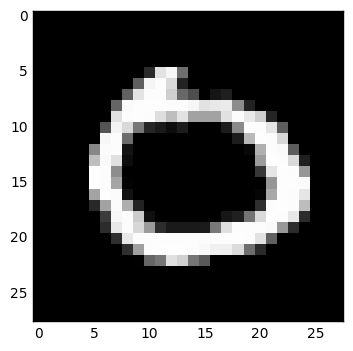

In [20]:
plt.imshow(image_templates[2,:,:],interpolation='none',cmap='gray')

In [21]:
template = borg.create_timeseries("TimeSeries", "categorical_image_stack", "template")

template.set_description('images that were presented in this session')
template.set_comments('this is a comment')

## what is the 'correct' shape?
# template = np.swapaxes(natural_images_template,0,2)
# template = np.swapaxes(natural_images_template,1,2)

# template.set_data(image_templates, unit='frame', conversion=1.0, resolution=1.0)
# template.ignore_time()

# template.set_value('field_of_view', self.field_of_view)
# template.set_value('dimension', self.corr_dimension)
# template.set_value('format', 'raw')
# template.set_value('bits_per_pixel', 8)

# template.finalize()

In [22]:
template.set_data(image_templates, unit='frame', conversion=1.0, resolution=1.0)
template.ignore_time()

# template.set_value('field_of_view', self.field_of_view)
template.set_value('dimension', image_templates.shape)
template.set_value('format', 'raw')
template.set_value('bits_per_pixel', 8)

In [23]:
template.set_value('category',template_df['image_category'].values.astype('S1'))
template.set_value('name',template_df['image_name'].values.astype('S5'))

template.finalize()

Warning -- '/stimulus/templates/categorical_image_stack' is missing the following:
	num_samples


In [24]:
from itertools import tee, izip_longest


def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return izip_longest(a, b)

for tr,next_tr in pairwise(data['triallog']):
    name = 'Trial_{}'.format(tr['index']) 
#     print tr,next_tr
    start = tr['starttime']
    try:
        stop = next_tr['starttime']
    except TypeError:
        stop = data['stoptime']
    print name,start,stop
    
    
    epoch = borg.create_epoch(name,start,stop)
    
    for k,v in tr.iteritems():
        
        if k in ('lick_times','stim_on_frames','reward_frames','reward_times'):
            continue
        if v is None:
            continue
        if len(v)==0:
            continue
            
        epoch.set_value(k,v)
    epoch.finalize()
    assert epoch.finalized
#     assert False

Trial_0 0.000344969332218 4.0019906871


TypeError: object of type 'float' has no len()

In [ ]:
all([ep.finalized for ep in borg.epoch_list])

In [25]:
borg.close()

## questions

- is there an existing convention for allen institute NWB file identifier that we need to conform to?
  - `"Brain Observatory Visual Coding Experiment " + str(self.meta_data.get_attribute('ophys_experiment_id'))`
- feature request: can the api return exceptions instead of SystemExit?
  - how to represent transformations of stimuli (for example, stretching or warping)?


## notes
- cumulative sum of vsync intervals is "master" clock for behavior-only
  - this means "frames" in triallog is "truth" and time gets recomputed
- to annotate image information (e.g. image category & name), we are using set_value to add new arrays to hdf file under /stimulus/templates/<template_name>/

## todo
- add timeseries data (licks, encoder (or computed velocity?))
  - split licks according to spout by indexing on unique values in second column of `lickData` array
  - trim lick times to onsets
- add key:value pairs for each trial
- add tags for each trial (trial_type, others?)
- link epochs to timeseries
- add session parameters to wherever they need to go. (/general?)
- populate /stimulus
  - use `stimuluslog` to build stimulus presentation array
- link epochs to /stimulus
- add reward frames to /stimulus

